<a href="https://colab.research.google.com/github/aakash1552005/sample/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Machine Learning Model for Diabetes Prediction***

In [ ]:
# @title Importing Important Dependencies
import numpy as np
import pandas as pd

In [ ]:
# Importing LogisticRegression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importing accuracy score function
from sklearn.metrics import accuracy_score

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
# Importing the Dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Checking for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


    Age        BMI
0    21  27.817460
1    22  29.509722
2    23  31.502632
3    24  32.569565
4    25  31.943750
5    26  34.915152
6    27  31.950000
7    28  33.642857
8    29  33.541379
9    30  30.033333
10   31  34.016667
11   32  32.318750
12   33  32.335294
13   34  31.164286
14   35  33.780000
15   36  31.718750
16   37  32.078947
17   38  35.568750
18   39  31.983333
19   40  33.538462
20   41  35.259091
21   42  34.983333
22   43  36.892308
23   44  34.162500
24   45  34.960000
25   46  34.523077
26   47  34.566667
27   48  29.980000
28   49  32.020000
29   50  31.225000
30   51  33.975000
31   52  33.475000
32   53  30.500000
33   54  30.800000
34   55  27.025000
35   56  31.700000
36   57  29.700000
37   58  32.428571
38   59  26.966667
39   60  28.740000
40   61  30.000000
41   62  28.950000
42   63  30.775000
43   64  25.000000
44   65  31.600000
45   66  30.375000
46   67  28.766667
47   68  35.600000
48   69  13.400000
49   70  32.500000
50   72  19.600000
51   81  25.

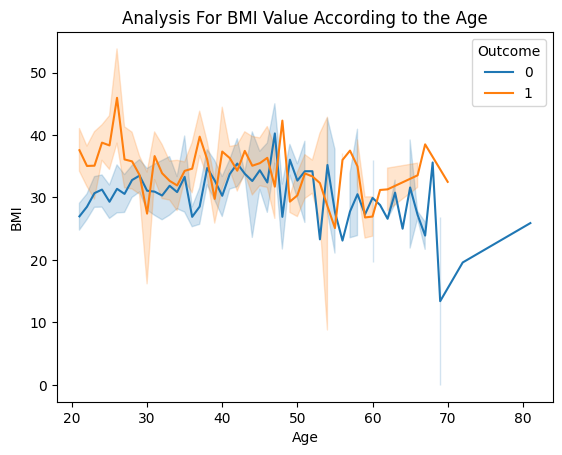

In [ ]:
# Basic Analysis

# Check the average BMI value according to the Age
analysis1 = df.groupby(by = 'Age')['BMI'].mean().reset_index()
print(analysis1)
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x = df['Age'],y = df['BMI'], hue = df['Outcome'])
plt.title("Analysis For BMI Value According to the Age")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [ ]:
# Seperating Input Feature and Label
# X - Input Feature(Every Single Coulmn except the Outcome column)
# Y - Label(Outcome)
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print("Shape of Original Data",X.shape)
print("Shape of Training Data(80%)",X_train.shape)
print("Shape of Testing Data(20%)",X_test.shape)

Shape of Original Data (768, 8)
Shape of Training Data(80%) (614, 8)
Shape of Testing Data(20%) (154, 8)


In [ ]:
# Model Training
model = LogisticRegression()
# Training the ML model using training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Checking Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of Training Data is", training_data_accuracy)

Accuracy score of Training Data is 0.7850162866449512


In [ ]:
# Checking Accuracy Score
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of Testing Data is", testing_data_accuracy)

Accuracy score of Testing Data is 0.7727272727272727


In [ ]:
# Building a predictive System
input_data = (7,106,92,18,0,22.7,0.235,48)
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the numpy array to one data point
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
# Prediction for one data Point
prediction = model.predict(input_data_reshape)
if prediction == 0:
  print("No Diabetes")
else:
  print("Diabetes")

No Diabetes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
